In [6]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox, zscore
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

skewness = skew(train['Fare'])
print("歪度 (Skewness):", skewness)




train = pd.read_csv('../data/kaggle/train.csv')
test = pd.read_csv('../data/kaggle/test.csv')

歪度 (Skewness): -0.040261256736706504


In [ ]:
sns.histplot(train['Fare'], kde=True)
plt.show()

In [7]:
skewness = skew(train['Fare'])
print("歪度 (Skewness):", skewness)

kurt = kurtosis(train['Fare'], fisher=True)  # Fisherの定義（正規分布なら0）
print("尖度 (Kurtosis):", kurt)

歪度 (Skewness): 4.7792532923723545
尖度 (Kurtosis): 33.20428925264474


In [4]:
# Box-Cox変換（最適なλを自動選択）
train['Fare'], lambda_opt = boxcox(train['Fare']+1)
# Zスコア変換（標準化）
train['Fare'] = zscore(train['Fare'])

c:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


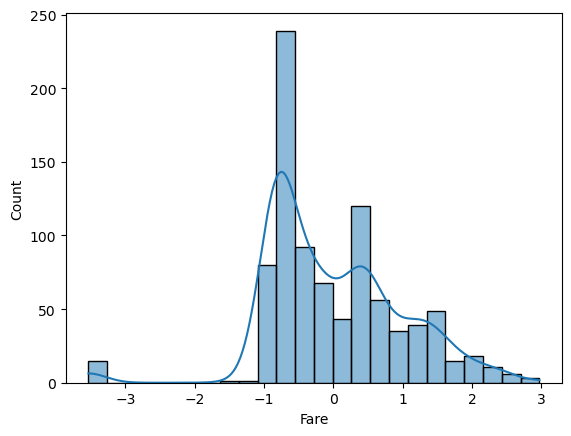

In [5]:
sns.histplot(train['Fare'], kde=True)
plt.show()


In [ ]:
# new_base_process

def process(data):
    data_processed = data.copy()

    data_processed['Miss'] = data_processed['Age'].isnull().astype(int)
    data_processed['Sex'] = data_processed['Sex'].map({'female':0, 'male':1})
    data_processed['Embarked'] = data_processed['Embarked'].fillna(data_processed['Embarked'].mode()[0])
    data_processed = pd.get_dummies(data_processed, columns=['Embarked'], prefix='Embarked', dtype=int)
    data_processed.drop(['Name','Ticket', 'Cabin'], axis=1, inplace=True)
    data_processed['Age'] = data_processed['Age'].fillna(data_processed["Age"].median())
    data_processed['Fare'] = data_processed['Fare'].fillna(data_processed['Fare'].median())
    return data_processed

train_processed = process(train).drop(['PassengerId'], axis=1)
test_processed = process(test)